# Continuation from ndarray.py 

If you want a copy of a slice from a `ndarray` you need to explicitly run `.copy()`

In [2]:
import numpy as np 
arr = np.arange(10)
arr_slice = arr[5:8].copy()
print(arr_slice)

[5 6 7]


With higher dimensional slicing, you have more options. For example, a 2d array will contain 1d arrays at each index. 

In [3]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("2d array:\n", arr2d)

2d array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [4]:
print(arr2d[2])

[7 8 9]


Access the second element from the second 1d array: 


In [7]:
print(arr2d[2][2])

# or 

print(arr2d[2, 2])

9
9


Note how we refer to the axes of the 2 dimensional array. 
- Axis 0 = rows,
- Axis 1 = columns

In multidimensional arrays, if you omit later indeces when indexing (i.e. you dont specify a value for each dimension in the array when indexing), the result will be a lower dimensional array. 

In [8]:
arr3d = np.array([[[1,2,3],[4,5,6]], [[1,2,3],[4,5,6]], [[1,2,3],[4,5,6]]])
print("3d array:\n", arr3d)

3d array:
 [[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]]


In [12]:
print("Indexing 3d array:\n\n", "arr3d[0]\n\n", arr3d[0])

Slicing 3d array:

 arr3d[0]

 [[1 2 3]
 [4 5 6]]


Just like in lower dimensions, both scalar values and arrays can be assigned to this view. **(we say view, because unless we explicitly make a copy, the subsection of the array that has been selected returns a view of the array)**

## Indexing with Slices

A slce selects a range along an axis. Let's select the forst two rows of arr2d

In [15]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [23]:
# i.e., select up to, but not including, row 2. 
# in other words, select rows 0, 1. 
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

You can also pass more than one slice just like with indexing. 

In [24]:
# select up to the first two rows along the 0th axis, select up to the first column on the 1st axis. 
arr2d[:2, :1]

array([[1],
       [4]])

**Again, by slicing like this, you always obtain array views of the same number of dimensions.**

Remember a colon `:` by itself means to take the entire selection on that axis. Also, assigning to a slice experssion assigns to the whole selection.

## Boolean Indexing

** Selecting data from an array by boolean indexing ALWAYS creates a copy of the data, even if the returned array is unchanged.**

Start with array of names with duplicates. 

In [27]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

print("\nnames\n", names)


names
 ['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']


Use `randn` function from `np.random` to generate some normally distributed data `data.

In [31]:
data = np.random.randn(7,4)
data

array([[ 1.80654981,  0.81800951, -1.08373878, -0.9555193 ],
       [ 1.03081376,  0.58821398, -0.14728399,  0.10717245],
       [-0.89572635, -0.05039885,  0.00592346, -0.4986752 ],
       [ 1.05991751,  0.49567552, -0.08387194,  0.71704313],
       [ 0.15012554,  1.63232492,  0.3441879 , -1.10361292],
       [-0.28298436,  1.2416874 , -0.15822024, -1.1265064 ],
       [ 0.83857643, -0.78637674,  0.71262016,  0.04689472]])

Even though `data` has nothing to do with names, we are going to make a boolean array using `names`, and index `data` with that.

In [36]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

You can also assign a variable name to this condition: 
- `condition = names == "Bob`

In [43]:
data[names == "Bob"]

array([[ 1.80654981,  0.81800951, -1.08373878, -0.9555193 ],
       [ 1.05991751,  0.49567552, -0.08387194,  0.71704313]])

Just make sure that the boolean array is of the same length as the array its axis is indexing. 

Note, you can also make a bool array for values that are not equal to bob by using the following syntax:
- `names != "Bob"`
- `~(names == "Bob")`

In [41]:
names_too_long = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe', "Arthur"])

In [42]:
data[names_too_long =="Bob"]

IndexError: boolean index did not match indexed array along axis 0; size of axis is 7 but size of corresponding boolean axis is 8

**IndexError: boolean index did not match indexed array along axis 0; size of axis is 7 but size of corresponding boolean axis is 8**

Assigning a variable name to the condition is an easier way to use the latter syntax for negation: 
- `~(condition)`

You can mix and match bool arrays with indexes as well if you would like to narrow down your search even more. 

**Note:** You can combine bool conditions using `&` (and) `|` (or). Pythonic `and` and `or` keywords do not work with boolean arrays.  

In [45]:
condition2 = (names == "Bob") & (names != "Bob")
condition2

array([False, False, False, False, False, False, False])

Lastly, setting values with a boolean array:
- setting everything less than 0 equal to zero 
- `data[data < 0] = 0`

## Fancy Indexing

This is a term adopted by NumPy to describe indexing using *integer* arrays. 

**Fancy indexing always copies the data into a new array**
- different from slicing
- similar to bool indexing

In [49]:
arr = np.empty((8,4))

In [50]:
for i in range(8):
    arr[i] = i

In [51]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

Index `arr` using an array and see what happens:

In [53]:
arr[[0, 2, 3]]

array([[0., 0., 0., 0.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.]])

It selects the corresponding rows along the 0th axis. 

Indexing with more than one array (in two dimensions) selects a 1d array of elements corresponding to each tuple of indeces. For example:
- `arr[[1,2,3],[4,5,6]]`
- This selects a 1d array with values matching (1,4) (2,5) (3,6).
- Think of this as a bingo board. 

## Transposing Arrays and Swapping Axes

Transposing is a special form of reshaping that similarly returns a view on the underlying data without copying anything. Arrays have the `transpose` method, and also the special `T` attribute.

In [57]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

Compare this to an array made without reshaping to `0th axis = 3` , `1st axis=5`

In [59]:
arr15 = np.arange(15)
arr15

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [60]:
# Transpose attribute switches the 1st axis to be of length 3, and the 0th axis to be of length 5
# Note that .T attribute is a special case of swapping axes. 
arr.T 

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

This is handy for matrix computations. 

In [61]:
# inner matrix product using np.dot()
arr = np.random.randn(6,3)


array([[ 1.26175312, -0.48451257, -1.15695102],
       [-0.34053114,  1.54933356,  2.16785948],
       [ 0.62288868, -0.24871723, -1.25119141],
       [ 0.44057399,  0.12513364,  0.75038645],
       [ 1.67055327,  0.78378086,  2.10895548],
       [ 0.65622822,  0.22385547,  0.06231148]])

In [62]:
np.dot(arr.T, arr)

array([[ 5.51146182,  0.21752387,  0.91725058],
       [ 0.21752387,  3.37712931,  5.99129393],
       [ 0.91725058,  5.99129393, 12.61828612]])

For higher dimensional arrays,`transpose` will accept a tuple of axis numbers to permute the axes. 

In [63]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

Note: We now have two arrays, each with 2 for the 0th axis, and 4 for the 1st axis. 

In [64]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

Here the axis have been reordered with the second axis first, the first axis second, and the last axis unchanged. 

 **Swapping axes** (not to be confused with .T, which is a special case of swapping axes). 

In [65]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [67]:
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

# 4.2 Universal Functions: Fast Element-Wise Array Functions. 

`ufunc` is a function that performs element-wise operations on data in ndarrays. In other words, fast vectorizes wrappers for simple functions that take one or more scalar values and produce one or more scalar results. 
- `np.sqrt()`
- `np.exp()`
- `np.maximum()` takes more than one array as args, and takes the element-wise maximum.
- `np.modf()` although uncommon, this one returns more than one array, which returns that fractional id integral parts of a floating-point array. you can also assign a tuple to it when calling it so that they are easily identified. 

`ufuncs` have an optional `out` argument that allows them to operate in-place on arrays. 

In [76]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [77]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [78]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [79]:
np.sqrt(arr, arr) 

UFuncTypeError: Cannot cast ufunc 'sqrt' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

Note: we cannot cast universal function `sqrt` output from `float64` to `int64` with casting rule `same_kind`. 

To avoid this, assign `dtype = 'float64'` when making the array so that the output of `sqrt` can be cast from `float64` to `float64`. i.e. the same dtype. 

# 4.3 Array Oriented Programming with Arrays 

Using numpy arrays enables us to express many kinds of data processing tasks as concise array experssions that might otherwise require loops. **This practice of replacing explicit loops with array expressions is commonly referred to as vectorization.** 

Ex. We wish to evaluate the function `sqrt(x^2 + y^2)` accross a regular grid of values. We can use the `np.meshgrid` function. This function takes two 1d arrays and produces two 2d matrices corresponding to all pairs of `(array1, array2)` values.

In [85]:
points = np.arange(-5, 5, .01) # 1d array, range from -5 to 5, step by 0.01
points

array([-5.0000000e+00, -4.9900000e+00, -4.9800000e+00, -4.9700000e+00,
       -4.9600000e+00, -4.9500000e+00, -4.9400000e+00, -4.9300000e+00,
       -4.9200000e+00, -4.9100000e+00, -4.9000000e+00, -4.8900000e+00,
       -4.8800000e+00, -4.8700000e+00, -4.8600000e+00, -4.8500000e+00,
       -4.8400000e+00, -4.8300000e+00, -4.8200000e+00, -4.8100000e+00,
       -4.8000000e+00, -4.7900000e+00, -4.7800000e+00, -4.7700000e+00,
       -4.7600000e+00, -4.7500000e+00, -4.7400000e+00, -4.7300000e+00,
       -4.7200000e+00, -4.7100000e+00, -4.7000000e+00, -4.6900000e+00,
       -4.6800000e+00, -4.6700000e+00, -4.6600000e+00, -4.6500000e+00,
       -4.6400000e+00, -4.6300000e+00, -4.6200000e+00, -4.6100000e+00,
       -4.6000000e+00, -4.5900000e+00, -4.5800000e+00, -4.5700000e+00,
       -4.5600000e+00, -4.5500000e+00, -4.5400000e+00, -4.5300000e+00,
       -4.5200000e+00, -4.5100000e+00, -4.5000000e+00, -4.4900000e+00,
       -4.4800000e+00, -4.4700000e+00, -4.4600000e+00, -4.4500000e+00,
      

In [86]:
xs, ys = np.meshgrid(points, points) 
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]],
      shape=(1000, 1000))

In [87]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]],
      shape=(1000, 1000))

In [88]:
# now we can evaluate the function 
# sqrt(x^2 + y^2)
z = np.sqrt(xs **2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]], shape=(1000, 1000))

Let's visualize this: 

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_6007/3427615404.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")


Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

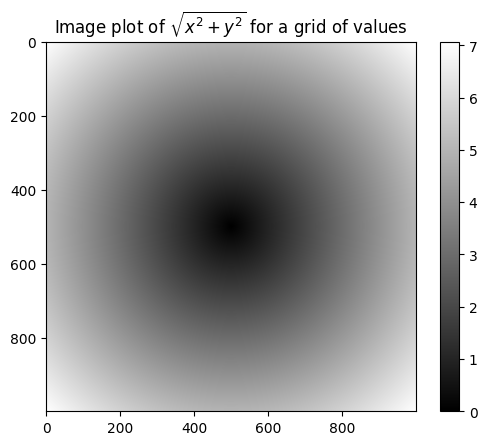

In [95]:
import matplotlib.pyplot as plt 
plt.imshow(z, 
           cmap=plt.cm.gray);
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")


## Expressing Conditional Logic as Array Operations 

The `numpy.where` function is a vectorized version of the ternary experssion `x if condition else y`

In [100]:
# lets make a bool array (condition) and two arrays to work with 
cond = np.array([True, False, True, True, False])
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

We want to take a value from `xarr` whenever the corresponding vbalue in the condition is True, otherwise we want to take the value from `yarr`

This can be done using a list comprehension like so: 
- `[(x if condition else y) for x, y, condition in zip(xarr, yarr, cond)`

In [101]:
[(x if condition else y) for x, y, condition in zip(xarr, yarr, cond)]

[np.float64(1.1),
 np.float64(2.2),
 np.float64(1.3),
 np.float64(1.4),
 np.float64(2.5)]

Issues with this approach: 
    - not very fast with large arrays because all the work is being done in interpreted python code. 
    - will not work with multidimensional arrays. 


In [107]:
# write it with np.where

np.where(cond, xarr, yarr)

array([1.1, 2.2, 1.3, 1.4, 2.5])

Note: The second and third condition in `np.where` dont need to be arrays; one or both of thm can be scalars. 
- A typical use of `where` in data analysis is to produce a new array of values based on another array.

Use this syntax: 
- `np.where( condition, if_condition_is_true, if_condition_is_untrue)`

## Mathematical and Statistical Methods